
\begin{array}{crll}Max & -3x_1+7x_2+12x_3 && & \\
s.a. &-3x_1+6x_2+8x_3 \leq &12&  \\
 &6x_1+-3x_2+7x_3 \leq &8& \\
  &2x_1+3x_2+3x_3 \leq &25& \\
 & x_1,x_3\in &\mathbb{Z}^+&\\
 & x_2\geq &0
 \end{array}

In [2]:
%pip install -q amplpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 26.5 MB/s eta 0:00:00


In [3]:
# Integración en Google Colab
from amplpy import AMPL, ampl_notebook

PR= ampl_notebook(
    modules=["highs", "cplex"],  # Solvers que queremos instalar
    license_uuid="d1619e22-974c-4935-ad8a-2554d161c51d",  # licencia que usaremos (os la he mandado por correo)
)  # instanciamos el objeto "AMPL" con el que vamos a trabajar

Licensed to Bundle #6787.7245 expiring 20250228: 302-Optimization; 408-Operations Research, Prof. Juan Miguel Morales Gonz?lez, University of Malaga.


**Modelado**

In [13]:
# @title PR

PR.eval(r"""
reset;
var x_1 >=0 ;
var x_2 >=0 ;
var x_3 >=0 ;


maximize FO:-3*x_1+7*x_2+12*x_3;

s.t. res1:
 (-3)*x_1+6*x_2+8*x_3 <=12;
     res2:
  6*x_1+(-3)*x_2+7*x_3<=8;
     res3:
  2*x_1+3*x_2+3*x_3<=25;
""")
PR.solve(solver="cplex") # Resolvemos con el solver "cplex"

print("\n") #Salto de linea

import pandas as pd

# Obtener los valores de las variables y del objetivo
x1 = PR.get_variable("x_1").value()
x2 = PR.get_variable("x_2").value()
x3 = PR.get_variable("x_3").value()
z = PR.get_objective("FO").value()

# Crear un DataFrame con los resultados
data = {
    'Variable': ['x1', 'x2','x3', 'FO'],
    'Valor': [x1, x2,x3, z]
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla
print(df_resultados)

CPLEX 22.1.1: CPLEX 22.1.1: optimal solution; objective 17.39393939
3 simplex iterations


  Variable      Valor
0       x1   0.000000
1       x2   0.303030
2       x3   1.272727
3       FO  17.393939


In [ ]:
!pip install networkx

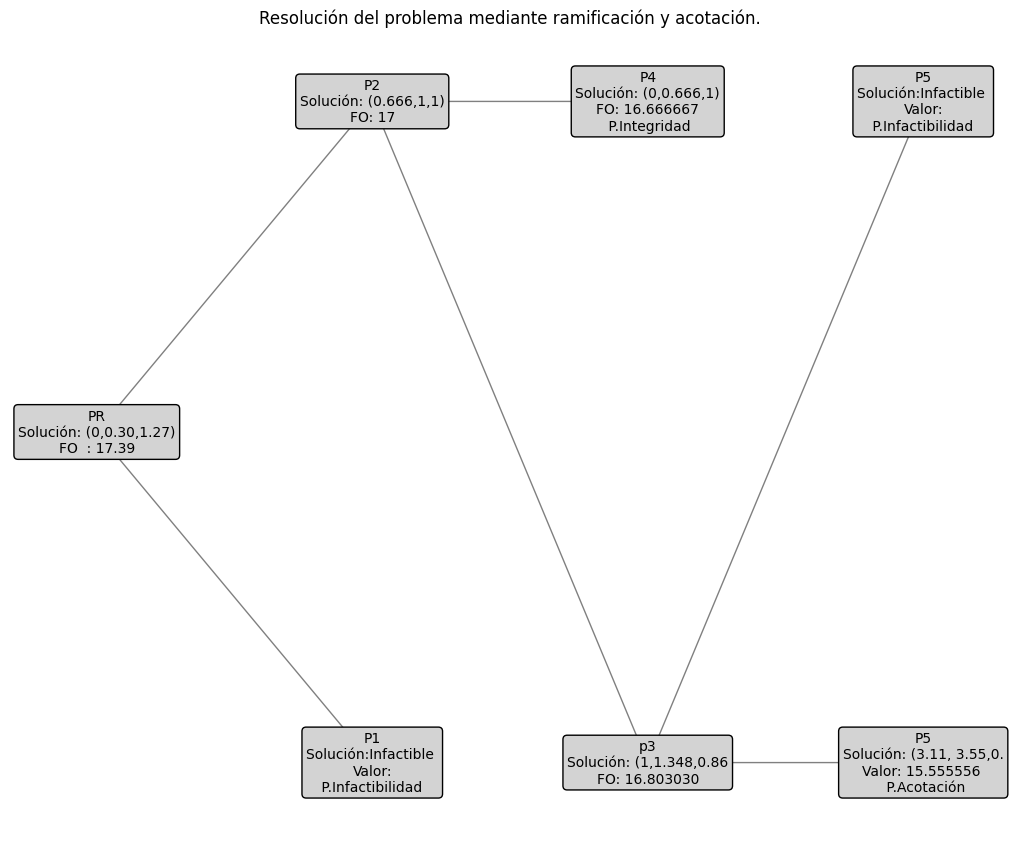

In [38]:
# @title Grafo
import matplotlib.pyplot as plt
import networkx as nx

# Crear el gráfico dirigido
G = nx.DiGraph()

# Añadir nodos con datos (Nombre del problema, solución, Valor objetivo) y nivel (subset)
G.add_node(1, label='PR\nSolución: (0,0.30,1.27)\nFO  : 17.39', subset=0)
G.add_node(2, label='P1\nSolución:Infactible \nValor:\n P.Infactibilidad ', subset=1)
G.add_node(3, label='P2\nSolución: (0.666,1,1)\nFO: 17', subset=1)
G.add_node(6, label='p3\nSolución: (1,1.348,0.86\nFO: 16.803030', subset=2)
G.add_node(7, label='P4\nSolución: (0,0.666,1)\nFO: 16.666667\n P.Integridad', subset=2)
G.add_node(8, label='P5\nSolución: (3.11, 3.55,0.\nValor: 15.555556 \n P.Acotación', subset=3)
G.add_node(9, label='P6\nSolución:Infactible \nValor:\n P.Infactibilidad ', subset=3)

# Añadir aristas (conexiones entre los nodos)
G.add_edges_from([(1, 2), (1, 3), (3, 6), (3, 7),(6,8),(6,9)])

# Crear la disposición de los nodos
pos = nx.multipartite_layout(G, subset_key='subset')

# Dibujar el gráfico
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=0, font_size=10, font_color="black", font_weight="bold", edge_color="grey")

# Añadir los nodos como rectángulos con etiquetas personalizadas
ax = plt.gca()
for node, (x, y) in pos.items():
    label = G.nodes[node]['label']
    plt.text(x, y, label, bbox=dict(facecolor='#d3d3d3', boxstyle='round,pad=0.3'), horizontalalignment='center', verticalalignment='center')

# Mostrar el gráfico
plt.title("Resolución del problema mediante ramificación y acotación.")
plt.show()



In [40]:
# @title P1
# Integración en Google Colab
from amplpy import AMPL, ampl_notebook

P1= ampl_notebook(
    modules=["highs", "cplex"],  # Solvers que queremos instalar
    license_uuid="d1619e22-974c-4935-ad8a-2554d161c51d",  # licencia que usaremos (os la he mandado por correo)
)  # instanciamos el objeto "AMPL" con el que vamos a trabajar
P1.eval(r"""
reset;
var x_1 >=0 ;
var x_2 >=0 ;
var x_3 >=0 ;


maximize FO:-3*x_1+7*x_2+12*x_3;

s.t. res1:
 (-3)*x_1+6*x_2+8*x_3 <=12;
     res2:
  6*x_1+(-3)*x_2+7*x_3<=8;
     res3:
  2*x_1+3*x_2+3*x_3<=25;
    nuevares1:
    x_3>=2;
""")
P1.solve(solver="cplex") # Resolvemos con el solver "cplex"

print("\n") #Salto de linea

import pandas as pd

# Obtener los valores de las variables y del objetivo
x1 = P1.get_variable("x_1").value()
x2 = P1.get_variable("x_2").value()
x3 = P1.get_variable("x_3").value()
z = P1.get_objective("FO").value()

# Crear un DataFrame con los resultados
data = {
    'Variable': ['x1', 'x2','x3', 'FO'],
    'Valor': [x1, x2,x3, z]
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla
print(df_resultados)

Licensed to Bundle #6787.7245 expiring 20250228: 302-Optimization; 408-Operations Research, Prof. Juan Miguel Morales Gonz?lez, University of Malaga.
	presolve: constraint res1 cannot hold:
		body <= 12 cannot be >= 21.5; difference = -9.5


  Variable  Valor
0       x1    0.0
1       x2    0.0
2       x3    0.0
3       FO    0.0


In [41]:
# @title P2

# Integración en Google Colab
from amplpy import AMPL, ampl_notebook

P2= ampl_notebook(
    modules=["highs", "cplex"],  # Solvers que queremos instalar
    license_uuid="d1619e22-974c-4935-ad8a-2554d161c51d",  # licencia que usaremos (os la he mandado por correo)
)  # instanciamos el objeto "AMPL" con el que vamos a trabajar
P2.eval(r"""
reset;
var x_1 >=0 ;
var x_2 >=0 ;
var x_3 >=0 ;


maximize FO:-3*x_1+7*x_2+12*x_3;

s.t. res1:
 (-3)*x_1+6*x_2+8*x_3 <=12;
     res2:
  6*x_1+(-3)*x_2+7*x_3<=8;
     res3:
  2*x_1+3*x_2+3*x_3<=25;
    nuevares1:
    x_3<=1;
""")
P2.solve(solver="cplex") # Resolvemos con el solver "cplex"

print("\n") #Salto de linea

import pandas as pd

# Obtener los valores de las variables y del objetivo
x1 = P2.get_variable("x_1").value()
x2 = P2.get_variable("x_2").value()
x3 = P2.get_variable("x_3").value()
z = P2.get_objective("FO").value()

# Crear un DataFrame con los resultados
data = {
    'Variable': ['x1', 'x2','x3', 'FO'],
    'Valor': [x1, x2,x3, z]
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla
print(df_resultados)

Licensed to Bundle #6787.7245 expiring 20250228: 302-Optimization; 408-Operations Research, Prof. Juan Miguel Morales Gonz?lez, University of Malaga.
CPLEX 22.1.1: CPLEX 22.1.1: optimal solution; objective 17
0 simplex iterations


  Variable      Valor
0       x1   0.666667
1       x2   1.000000
2       x3   1.000000
3       FO  17.000000


In [42]:
# @title P3

# Integración en Google Colab
from amplpy import AMPL, ampl_notebook

P3= ampl_notebook(
    modules=["highs", "cplex"],  # Solvers que queremos instalar
    license_uuid="d1619e22-974c-4935-ad8a-2554d161c51d",  # licencia que usaremos (os la he mandado por correo)
)  # instanciamos el objeto "AMPL" con el que vamos a trabajar
P3.eval(r"""
reset;
var x_1 >=0 ;
var x_2 >=0 ;
var x_3 >=0 ;


maximize FO:-3*x_1+7*x_2+12*x_3;

s.t. res1:
 (-3)*x_1+6*x_2+8*x_3 <=12;
     res2:
  6*x_1+(-3)*x_2+7*x_3<=8;
     res3:
  2*x_1+3*x_2+3*x_3<=25;
    nuevares1:
    x_3<=1;
    nueravars:
    x_1>=1;
""")
P3.solve(solver="cplex") # Resolvemos con el solver "cplex"

print("\n") #Salto de linea

import pandas as pd

# Obtener los valores de las variables y del objetivo
x1 = P3.get_variable("x_1").value()
x2 = P3.get_variable("x_2").value()
x3 = P3.get_variable("x_3").value()
z = P3.get_objective("FO").value()

# Crear un DataFrame con los resultados
data = {
    'Variable': ['x1', 'x2','x3', 'FO'],
    'Valor': [x1, x2,x3, z]
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla
print(df_resultados)

Licensed to Bundle #6787.7245 expiring 20250228: 302-Optimization; 408-Operations Research, Prof. Juan Miguel Morales Gonz?lez, University of Malaga.
CPLEX 22.1.1: CPLEX 22.1.1: optimal solution; objective 16.8030303
0 simplex iterations


  Variable      Valor
0       x1   1.000000
1       x2   1.348485
2       x3   0.863636
3       FO  16.803030


In [43]:
# @title P4
# Integración en Google Colab
from amplpy import AMPL, ampl_notebook

P4= ampl_notebook(
    modules=["highs", "cplex"],  # Solvers que queremos instalar
    license_uuid="d1619e22-974c-4935-ad8a-2554d161c51d",  # licencia que usaremos (os la he mandado por correo)
)  # instanciamos el objeto "AMPL" con el que vamos a trabajar
P4.eval(r"""
reset;
var x_1 >=0 ;
var x_2 >=0 ;
var x_3 >=0 ;


maximize FO:-3*x_1+7*x_2+12*x_3;

s.t. res1:
 (-3)*x_1+6*x_2+8*x_3 <=12;
     res2:
  6*x_1+(-3)*x_2+7*x_3<=8;
     res3:
  2*x_1+3*x_2+3*x_3<=25;
    nuevares1:
    x_3<=1;
    nueravars:
    x_1<=0;
""")
P4.solve(solver="cplex") # Resolvemos con el solver "cplex"

print("\n") #Salto de linea

import pandas as pd

# Obtener los valores de las variables y del objetivo
x1 = P4.get_variable("x_1").value()
x2 = P4.get_variable("x_2").value()
x3 = P4.get_variable("x_3").value()
z = P4.get_objective("FO").value()

# Crear un DataFrame con los resultados
data = {
    'Variable': ['x1', 'x2','x3', 'FO'],
    'Valor': [x1, x2,x3, z]
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla
print(df_resultados)

Licensed to Bundle #6787.7245 expiring 20250228: 302-Optimization; 408-Operations Research, Prof. Juan Miguel Morales Gonz?lez, University of Malaga.
CPLEX 22.1.1: CPLEX 22.1.1: optimal solution; objective 16.66666667
0 simplex iterations


  Variable      Valor
0       x1   0.000000
1       x2   0.666667
2       x3   1.000000
3       FO  16.666667


In [44]:
# @title P5

# Integración en Google Colab
from amplpy import AMPL, ampl_notebook

P5= ampl_notebook(
    modules=["highs", "cplex"],  # Solvers que queremos instalar
    license_uuid="d1619e22-974c-4935-ad8a-2554d161c51d",  # licencia que usaremos (os la he mandado por correo)
)  # instanciamos el objeto "AMPL" con el que vamos a trabajar
P5.eval(r"""
reset;
var x_1 >=0 ;
var x_2 >=0 ;
var x_3 >=0 ;


maximize FO:-3*x_1+7*x_2+12*x_3;

s.t. res1:
 (-3)*x_1+6*x_2+8*x_3 <=12;
     res2:
  6*x_1+(-3)*x_2+7*x_3<=8;
     res3:
  2*x_1+3*x_2+3*x_3<=25;
    nuevares1:
    x_3<=0;
    nueravars:
    x_1>=1;
""")
P5.solve(solver="cplex") # Resolvemos con el solver "cplex"

print("\n") #Salto de linea

import pandas as pd

# Obtener los valores de las variables y del objetivo
x1 = P5.get_variable("x_1").value()
x2 = P5.get_variable("x_2").value()
x3 = P5.get_variable("x_3").value()
z = P5.get_objective("FO").value()

# Crear un DataFrame con los resultados
data = {
    'Variable': ['x1', 'x2','x3', 'FO'],
    'Valor': [x1, x2,x3, z]
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla
print(df_resultados)

Licensed to Bundle #6787.7245 expiring 20250228: 302-Optimization; 408-Operations Research, Prof. Juan Miguel Morales Gonz?lez, University of Malaga.
CPLEX 22.1.1: CPLEX 22.1.1: optimal solution; objective 15.55555556
0 simplex iterations


  Variable      Valor
0       x1   3.111111
1       x2   3.555556
2       x3   0.000000
3       FO  15.555556


**Tenemos que nuestra función objetivo quedó actodada entre lso valores 17.39 y 16.666 luego procedemos a realizar poda por acotación**

Notese que ya antes vimos que si $x_3\geq 1$ el problema es infactible, luego P6 será infactible.

In [45]:
# @title P6

# Integración en Google Colab
from amplpy import AMPL, ampl_notebook

P6= ampl_notebook(
    modules=["highs", "cplex"],  # Solvers que queremos instalar
    license_uuid="d1619e22-974c-4935-ad8a-2554d161c51d",  # licencia que usaremos (os la he mandado por correo)
)  # instanciamos el objeto "AMPL" con el que vamos a trabajar
P6.eval(r"""
reset;
var x_1 >=0 ;
var x_2 >=0 ;
var x_3 >=0 ;


maximize FO:-3*x_1+7*x_2+12*x_3;

s.t. res1:
 (-3)*x_1+6*x_2+8*x_3 <=12;
     res2:
  6*x_1+(-3)*x_2+7*x_3<=8;
     res3:
  2*x_1+3*x_2+3*x_3<=25;
    nuevares1:
    x_3>=1;
    nueravars:
    x_1>=1;
""")
P6.solve(solver="cplex") # Resolvemos con el solver "cplex"

print("\n") #Salto de linea

import pandas as pd

# Obtener los valores de las variables y del objetivo
x1 = P6.get_variable("x_1").value()
x2 = P6.get_variable("x_2").value()
x3 = P6.get_variable("x_3").value()
z = P6.get_objective("FO").value()

# Crear un DataFrame con los resultados
data = {
    'Variable': ['x1', 'x2','x3', 'FO'],
    'Valor': [x1, x2,x3, z]
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla
print(df_resultados)

Licensed to Bundle #6787.7245 expiring 20250228: 302-Optimization; 408-Operations Research, Prof. Juan Miguel Morales Gonz?lez, University of Malaga.
	presolve: constraint res2 cannot hold:
		body <= 8 cannot be >= 11.75; difference = -3.75


  Variable  Valor
0       x1    0.0
1       x2    0.0
2       x3    0.0
3       FO    0.0
